# Proyecto Final de Inferencia Estadistica

# Introducción
---

En este cuaderno de Jupyter, Usaremos el dataset "spotify_songs.csv", obtenido directamente del API de Spotify. Usaremos tecnicas de inferencia estadística para descubrir patrones en las canciones de Spotify, que es lo que hace que una cancion sea popular, atributos, artistas y sus interrelaciones. 

El dataset ya esta listos para usar, porque no ocupan preprocesamiento o limpieza para hacer analisis.

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import zipfile
import os

In [3]:
df = pd.read_csv("spotify_songs.csv")

# Análisis Exploratorio de Datos (EDA)
---
Para el EDA, visualizaremos diferentes aspectos del conjunto de datos de Spotify utilizando gráficos estadísticos.



1. **Distribucion de los datos**: Media, Moda, desviacion estandar, count (n), cuartiles, maximos y minimos.

In [5]:
df.select_dtypes(['float', 'int']).describe() 
#solo podemos sacarle media, desviacion estandar, etc. a los datos numericos, por eso los filtramos

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


2. **Diagramas de Caja**: Estos se utilizarán para visualizar la distribución de la popularidad de las canciones, que tan ruidosas son y el tempo. Los diagramas de caja se usan para comprender la mediana, los cuartiles e identificar cualquier posible valor atípico en los datos.

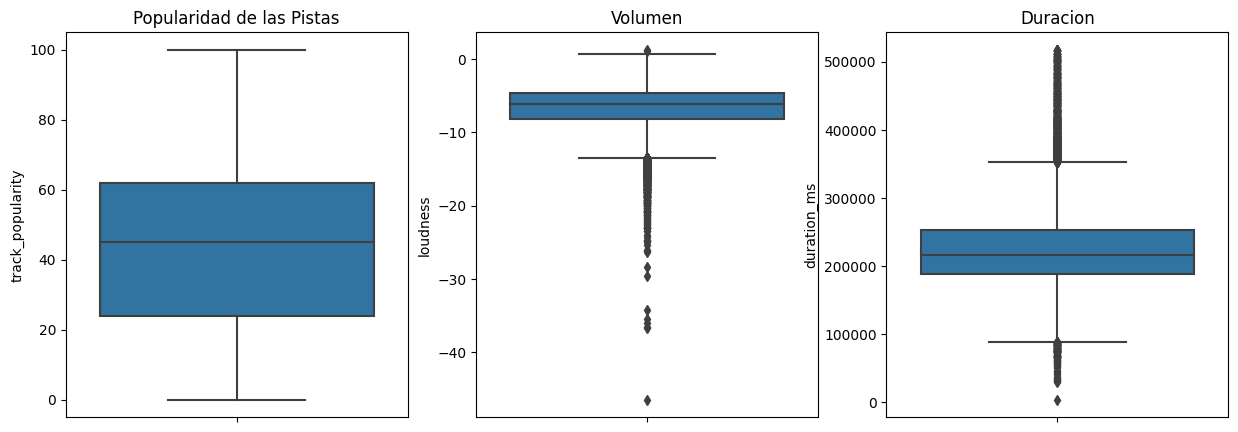

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['track_popularity'])
plt.title('Popularidad de las Canciones')
plt.subplot(1, 3, 2)
sns.boxplot(y=df['loudness'])
plt.title('Volumen')
plt.subplot(1, 3, 3)
sns.boxplot(y=df['duration_ms'])
plt.title('Duracion')
plt.show()

3. **Gráficos de Densidad**: Para examinar la distribución de la popularidad de las Canciones, el volumen y el tempo. Los gráficos de densidad dan una idea de dónde se concentran los datos y la forma de la distribución.

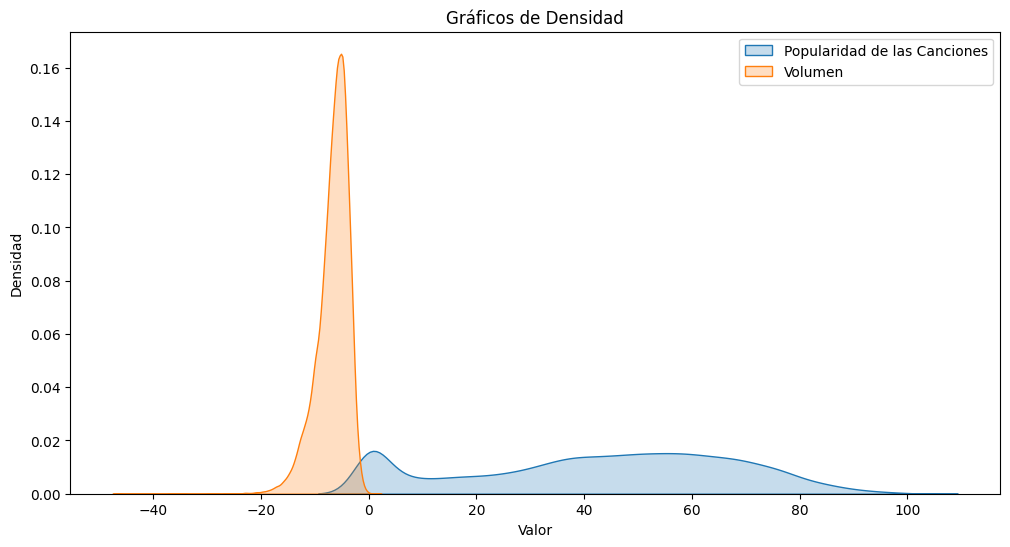

In [77]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['track_popularity'], fill=True, label="Popularidad de las Canciones")
sns.kdeplot(df['loudness'], fill=True, label="Volumen")
plt.title('Gráficos de Densidad')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

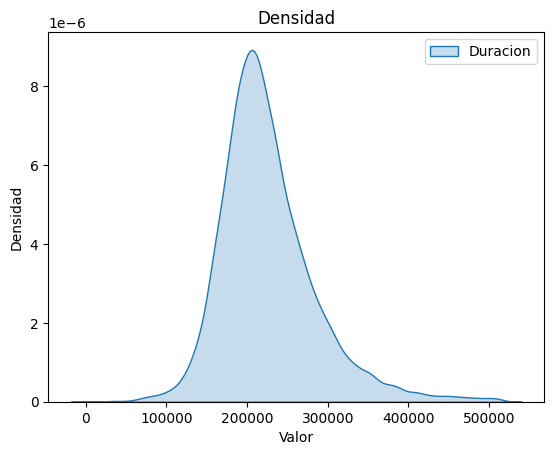

In [58]:
sns.kdeplot(df['duration_ms'], fill=True, label="Duracion")
plt.title('Densidad')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

4. **Histogramas**: Se crearán para la popularidad, el volumen y el tempo para entender la distribución de frecuencias de estas características. Los histogramas son esenciales para visualizar cuán comunes son diferentes rangos de estas características.

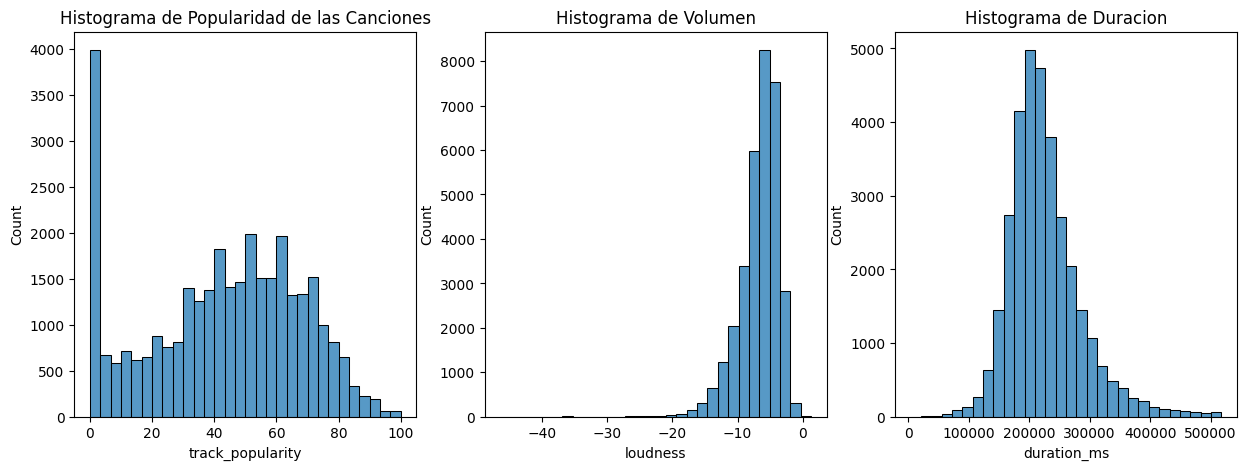

In [212]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['track_popularity'], bins=30)
plt.title('Histograma de Popularidad de las Canciones')
plt.subplot(1, 3, 2)
sns.histplot(df['loudness'], bins=30)
plt.title('Histograma de Volumen')
plt.subplot(1, 3, 3)
sns.histplot(df['duration_ms'], bins=30)
plt.title('Histograma de Duracion')
plt.show()

5. **Gráficos QQ**: Para verificar la normalidad de las distribuciones. Este paso es crucial para determinara que atributos se les puede aplicar las pruebas estadísticas que asumen normalidad en las distribuciones de datos.

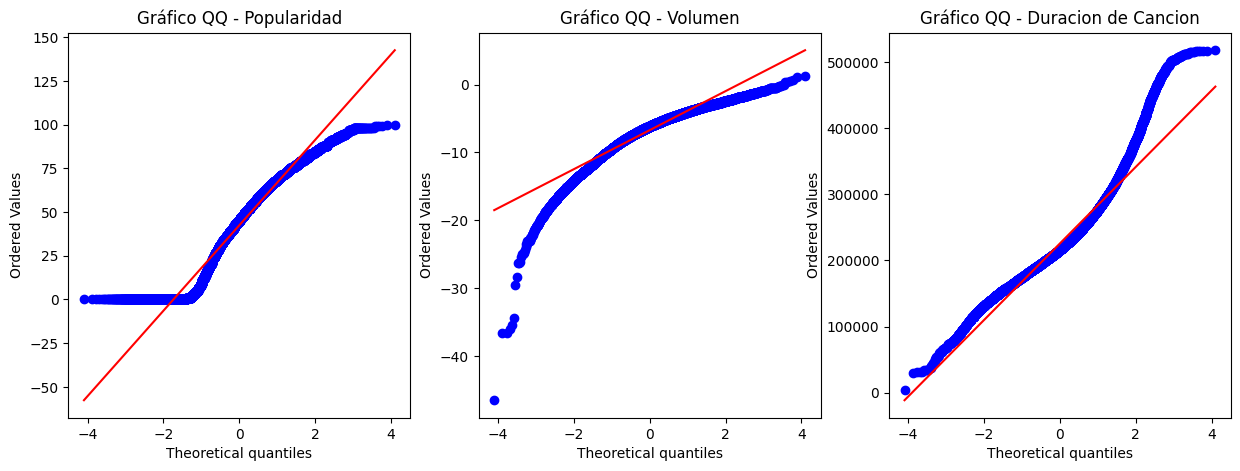

In [61]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
stats.probplot(df['track_popularity'], dist="norm", plot=plt)
plt.title('Gráfico QQ - Popularidad')
plt.subplot(1, 3, 2)
stats.probplot(df['loudness'], dist="norm", plot=plt)
plt.title('Gráfico QQ - Volumen')
plt.subplot(1, 3, 3)
stats.probplot(df['duration_ms'], dist="norm", plot=plt)
plt.title('Gráfico QQ - Duracion de Cancion')
plt.show()

6. **Artistas y Sus Canciones Mas Populares:** 
Visualizacion por Medio de Treemap

In [14]:
fig = px.treemap(df.groupby(['track_artist', 'track_name']).track_popularity.mean().sort_values(ascending=False).reset_index()[:100],
                 path=['track_artist', 'track_name'], 
                 values='track_popularity',
                 title="Artistas y sus canciones mas populares"
                )
fig.show()

7. **Generos y Subgeneros mas populares:** 
Por Medio de Pie Sunburst

In [153]:
df[df['track_popularity']<40]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
19,2v3DuCVBbopteJqdM7aKQK,Let It Be Me - Sondr Remix,Steve Aoki,35,097kyycr5ZuLS2cPwwUHwt,Let It Be Me (Remixes),2019-10-18,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,Pop,...,7,-5.466,1,0.0934,0.007910,0.000441,0.131,0.2320,122.676,185366
27,1zzOMDmkRZy0g9f4JTAZKn,Close To Me (with Diplo) (feat. Swae Lee) - CI...,Ellie Goulding,8,5bMicFMWsZlRZNTDq9h3oA,Close To Me (Remixes),2019-02-01,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,Pop,...,1,-3.781,0,0.0511,0.032500,0.000000,0.333,0.3970,125.996,175000
29,1hr5Y2i4NlE3LPvQZ9Q5Ao,When You Leave - Breathe Carolina Remix,Nikki Vianna,30,6MhbDWEsAP9Xsgoj0TuEOc,When You Leave (Breathe Carolina Remix),2019-04-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,Pop,...,1,-2.929,1,0.1050,0.033400,0.000000,0.269,0.8190,119.885,155080
51,5rxKInBVj0QE87KenyDiLf,Crash Into Me - Settle Down Steavis Aoki Remix,Steve Aoki,34,6GXIqRarFMaBWoF4N33foM,Crash Into Me (Settle Down Steavis Aoki Remix),2019-11-12,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,Pop,...,1,-2.996,0,0.0343,0.000609,0.010900,0.262,0.1200,127.984,266719
70,05CwHjIk71RXVU40boRMnR,Call You Mine,The Chainsmokers,39,1ONuDpN0a3zhCUyKCgtuzK,World War Joy,2019-05-31,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,Pop,...,7,-5.590,1,0.0289,0.225000,0.000000,0.414,0.5010,104.003,217653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32827,0aBDrRTgDCwWbcOnEIp7DJ,Many Ways - Radio Edit,Ferry Corsten feat. Jenny Wahlstrom,27,59XOfNjuYZB6feC6QUzS3e,Many Ways,2013,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,Edm,...,5,-8.367,1,0.0365,0.026600,0.000000,0.572,0.2880,128.001,196993
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,Edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.375,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,Edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.150,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,Edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.343,0.3080,128.008,367432


In [35]:
df[['playlist_genre', 'playlist_subgenre']] = df[['playlist_genre', 'playlist_subgenre']] \
                                                  .apply(lambda x: x.str.capitalize(), axis=1)
fig = px.sunburst(df,
                  path=['playlist_genre', 'playlist_subgenre'], 
                  color='track_popularity', 
                  title="Generos y Subgeneros mas Populares",
                  labels={'track_popularity': 'Popularidad'})
fig.show()

8. **Correlaciones entre variables**

In [36]:
corr = df.corr()
corr

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_popularity,1.000000,0.064748,-0.109112,-0.000650,0.057687,0.010637,0.006819,0.085159,-0.149872,-0.054584,0.033231,-0.005378,-0.143682
danceability,0.064748,1.000000,-0.086073,0.011736,0.025335,-0.058647,0.181721,-0.024519,-0.008655,-0.123859,0.330523,-0.184084,-0.096879
energy,-0.109112,-0.086073,1.000000,0.010052,0.676625,-0.004800,-0.032150,-0.539745,0.033247,0.161223,0.151103,0.149951,0.012611
key,-0.000650,0.011736,0.010052,1.000000,0.000959,-0.174093,0.022607,0.004306,0.005968,0.002887,0.019914,-0.013370,0.015139
loudness,0.057687,0.025335,0.676625,0.000959,1.000000,-0.019289,0.010339,-0.361638,-0.147824,0.077613,0.053384,0.093767,-0.115058
mode,0.010637,-0.058647,-0.004800,-0.174093,-0.019289,1.000000,-0.063512,0.009415,-0.006741,-0.005549,0.002614,0.014329,0.015634
speechiness,0.006819,0.181721,-0.032150,0.022607,0.010339,-0.063512,1.000000,0.026092,-0.103424,0.055426,0.064659,0.044603,-0.089431
acousticness,0.085159,-0.024519,-0.539745,0.004306,-0.361638,0.009415,0.026092,1.000000,-0.006850,-0.077243,-0.016845,-0.112724,-0.081581
instrumentalness,-0.149872,-0.008655,0.033247,0.005968,-0.147824,-0.006741,-0.103424,-0.006850,1.000000,-0.005507,-0.175402,0.023335,0.063235
liveness,-0.054584,-0.123859,0.161223,0.002887,0.077613,-0.005549,0.055426,-0.077243,-0.005507,1.000000,-0.020560,0.021018,0.006138


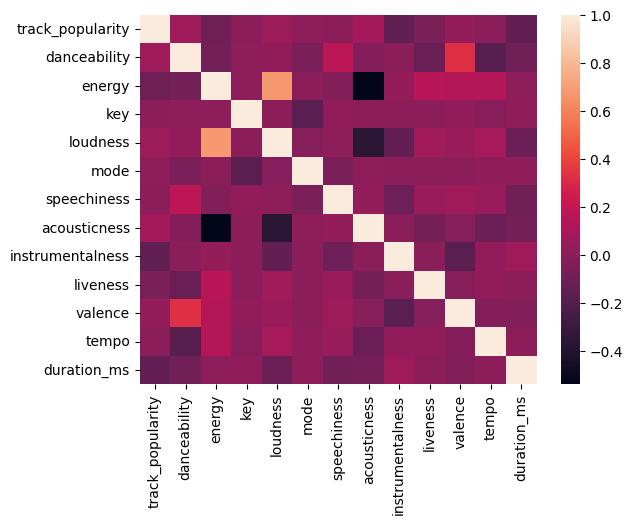

<Figure size 640x480 with 0 Axes>

In [37]:
sns.heatmap(corr)
plt.show()
plt.clf()

# Pruebas de Hipotesis

Vamos a hacer algunas pruebas


1. **El Rock esta muerto?**

Hipótesis:
* **H0 (Hipótesis nula)**: No hay diferencia significativa en la popularidad media de las canciones entre los géneros "rap" y "rock".
* **H1 (Hipótesis alternativa)**: Existe una diferencia significativa en la popularidad media de las canciones entre los géneros "rap" y "rock".

In [47]:
canciones_rap = df[df['playlist_genre'] == 'Rap']['track_popularity'].dropna()
canciones_rock = df[df['playlist_genre'] == 'Rock']['track_popularity'].dropna()

# Realizar una prueba t de Student
t_stat, p_value = stats.ttest_ind(canciones_rap, canciones_rock, equal_var=False)

# Mostrar los resultados de la prueba
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

Estadístico t: 3.177943408585225
Valor p: 0.0014876479564731916


##### En efecto, ya que p<0.015 (improbable que haya pasado bajo H0), la diferencia entre los datos nos indica que podemos afirmar estadisticamente que el rock ha muerto

2. **Que tanto influencia el que una cancion tenga mucha o poca letra?**
* H0: No hay diferencia en la popularidad de las canciones con alto y bajo contenido vocal.
* H1: Hay una diferencia en la popularidad de las canciones con alto y bajo contenido vocal.


In [51]:
alto_instrumentalness = df[df['instrumentalness'] > 0.5]['track_popularity'].dropna()
bajo_instrumentalness = df[df['instrumentalness'] <= 0.5]['track_popularity'].dropna()

t_stat, p_value = stats.ttest_ind(alto_instrumentalness, bajo_instrumentalness, equal_var=False)
print("Prueba de vocalidad/instrumentalidad")
print("Estadístico t:", t_stat, ", Valor p:", p_value)

Prueba de vocalidad/instrumentalidad
Estadístico t: -26.919229939463325 , Valor p: 3.861590784329301e-145


**Este valor p extremadamente bajo indica que hay una diferencia estadísticamente significativa en la popularidad entre canciones con alto y bajo contenido vocal. 
El estadístico t negativo sugiere que las canciones con menor contenido vocal (más instrumentales) tienden a ser más populares.**

3. **Que tanto influencia que una cancion sea bailable en su popularidad?**

* H0: No hay diferencia en la popularidad de las canciones dependiendo de que tan bailables son.
* H1: Hay una diferencia en la popularidad de las canciones dependiendo de que tan bailables son.

In [52]:
muy_bailable = df[df['danceability'] > 0.5]['track_popularity'].dropna()
poco_bailable = df[df['danceability'] <= 0.5]['track_popularity'].dropna()

t_stat, p_value = stats.ttest_ind(muy_bailable, poco_bailable, equal_var=False)
print("Prueba de bailabilidad")
print("Estadístico t:", t_stat, ", Valor p:", p_value)

Prueba de vocalidad/instrumentalidad
Estadístico t: 5.650991241821853 , Valor p: 1.659560507761318e-08


**Un valor p muy bajo también indica una diferencia significativa en la popularidad entre canciones muy bailables y poco bailables. El estadístico t positivo sugiere que las canciones más bailables tienden a ser más populares.**

4. **Que tanto influencia la duracion de una cancion en su popularidad?**

* H0: La duracion de una cancion no influencia en su popularidad
* H1: Hay diferencia en popularidad entre canciones cortas y largas

In [63]:
umbral_duracion = df['duration_ms'].median()

largas = df[df['duration_ms'] > umbral_duracion]['track_popularity'].dropna()
cortas = df[df['duration_ms'] <= umbral_duracion]['track_popularity'].dropna()

# Realizar una prueba t de Student
t_stat_duracion, p_value_duracion = stats.ttest_ind(largas, cortas, equal_var=False)

print("Prueba de Duracion")
print(f"Estadístico t: {t_stat_duracion}")
print(f"Valor p: {p_value_duracion}")

Prueba de Duracion
Estadístico t: -20.366518930000616
Valor p: 1.2287880592394535e-91


**Un valor p extremadamente bajo indica una diferencia significativa en la popularidad entre canciones largas y cortas. El estadístico t negativo sugiere que las canciones más cortas tienden a ser más populares.**

5. Hoy en dia, existe diferencia entre el pop y el rap?

In [72]:
popularidad_pop = df[df['playlist_genre'] == 'Pop']['track_popularity'].dropna()
popularidad_rap = df[df['playlist_genre'] == 'Rap']['track_popularity'].dropna()

t_stat_genero, p_value_genero = stats.ttest_ind(popularidad_pop, popularidad_rap, equal_var=False)
print("Prueba de género - Estadístico t:", t_stat_genero, ", Valor p:", p_value_genero)

Prueba de género - Estadístico t: 9.89738284492779 , Valor p: 5.32112434399586e-23


**Existe diferencia entre el pop y el rock; el estadistico t positivo nos dice que el pop es mas popular**

5. **Son mas populares las canciones ruidosas?**

In [106]:
percentil_75_popularidad = df['track_popularity'].quantile(0.75)
canciones_populares = df[df['track_popularity'] >= percentil_75_popularidad]['loudness']
canciones_menos_populares = df[df['track_popularity'] < percentil_50_popularidad]['loudness']


In [98]:
t_stat_loudness, p_value_loudness = stats.ttest_ind(canciones_populares.dropna(), canciones_menos_populares.dropna(), equal_var=False)

print(f"Estadístico t: {t_stat_loudness}")
print(f"Valor p: {p_value_loudness}")

Estadístico t: 8.34395707704962
Valor p: 7.463805302704826e-17


**Se rechaza la hipotesis nula; el valor t nos indica que las canciones ruidosas suelen ser mas populares**

# Maxima Verosimilitud

Considerando los valores que sabemos influencian la popularidad de una cancion, aproximemos las medias de las caracteristicas de canciones populares

In [75]:
def ms_a_minutos_segundos(milisegundos):
    minutos = int(milisegundos // 60000)
    segundos = int((milisegundos % 60000) / 1000)
    return f"{minutos}:{segundos:02d}"

In [216]:
cuartil_superior = df[df['track_popularity'] >= df['track_popularity'].quantile(0.75)]

media_duracion, _ = norm.fit(cuartil_superior['duration_ms'])
media_volumen, _ = norm.fit(cuartil_superior['loudness'])
media_instrumentalidad, _ = norm.fit(cuartil_superior['instrumentalness'])

print(f"Una cancion popular tiene una media estimada de duración: {ms_a_minutos_segundos(media_duracion)}")
print(f"Una cancion popular tiene una media estimada de volumen: {media_volumen}")
print(f"Una cancion popular tiene una media estimada de instrumentalidad: {media_instrumentalidad}")

Una cancion popular tiene una media estimada de duración: 3:39
Una cancion popular tiene una media estimada de volumen: -6.291661420118344
Una cancion popular tiene una media estimada de instrumentalidad: 0.02491247337514793


# Intervalos de Confianza

Habiendo hecho hipotesis sobre los factores que influencian la popularidad de una cancion, y sabiendo como se ven las medias estimadas de las caracteristicas, quiero saber mas o menos que caracteristicas deberia tener una cancion popular

1. **Que duracion tendra una cancion popular?** Usemos las canciones populares para verlo

In [233]:
percentil_75_popularidad = df['track_popularity'].quantile(0.75)
canciones_populares = df[df['track_popularity'] >= percentil_75_popularidad]['duration_ms']

media_duracion = canciones_populares.mean()
stderr_duracion = stats.sem(canciones_populares)
margen_error = stderr_duracion * stats.t.ppf((1 + 0.95) / 2, len(canciones_populares) - 1)

intervalo_confianza_duracion = ((media_duracion - margen_error)*0.001, (media_duracion + margen_error)*0.001)

intervalo_confianza_min_seg_inferior = ms_a_minutos_segundos((media_duracion - margen_error))
intervalo_confianza_min_seg_superior = ms_a_minutos_segundos((media_duracion + margen_error))

print(f"Intervalo de confianza al 95% para la duración de las canciones populares (en minutos y segundos): {intervalo_confianza_min_seg_inferior} - {intervalo_confianza_min_seg_superior}")

Intervalo de confianza al 95% para la duración de las canciones populares (en minutos y segundos): 3:38 - 3:40


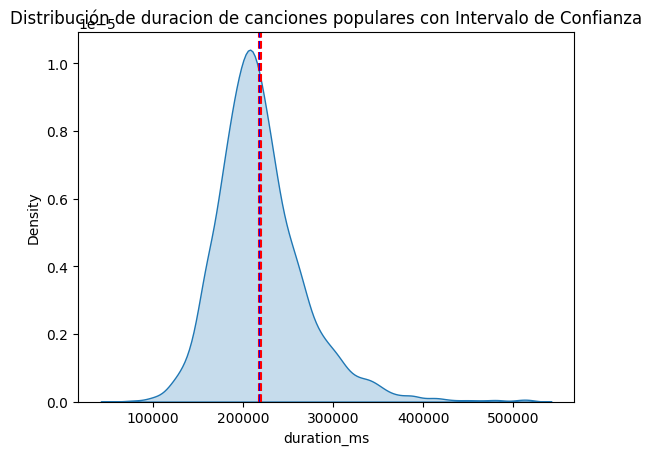

In [225]:
canciones_populares = df[df['track_popularity'] >= df['track_popularity'].quantile(0.75)]

sns.kdeplot(canciones_populares['duration_ms'], fill=True)
plt.axvline(x=intervalo_confianza_duracion[0]/0.001, color='red', linestyle='--')

plt.axvline(x=media_duracion, color='blue', linestyle='--')

plt.axvline(x=intervalo_confianza_duracion[1]/0.001, color='red', linestyle='--')
plt.title('Distribución de duracion de canciones populares con Intervalo de Confianza')
plt.show()

**Una cancion popular generalmente dura alrededor de 3:38-3:40**

2. **Que ratio de bailabilidad, volumen, e instrumentalidad debe tener una cancion popular?**

In [103]:
percentil_75_popularidad = df['track_popularity'].quantile(0.75)
canciones_populares = df[df['track_popularity'] >= percentil_75_popularidad]

media_bailabilidad = canciones_populares['danceability'].mean()
stderr_bailabilidad = stats.sem(canciones_populares['danceability'].dropna())
margen_error_bailabilidad = stderr_bailabilidad * stats.t.ppf((1 + 0.95) / 2, len(canciones_populares['danceability']) - 1)
intervalo_confianza_bailabilidad = (media_bailabilidad - margen_error_bailabilidad, media_bailabilidad + margen_error_bailabilidad)

print(f"Intervalo de confianza al 95% para la bailabilidad: {intervalo_confianza_bailabilidad}")

Intervalo de confianza al 95% para la bailabilidad: (0.6654343050554368, 0.6716540026368709)


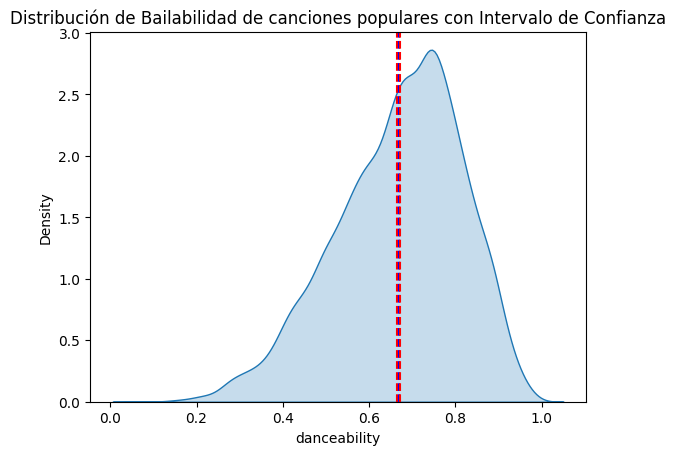

In [217]:
canciones_populares = df[df['track_popularity'] >= df['track_popularity'].quantile(0.75)]

sns.kdeplot(canciones_populares['danceability'], fill=True)
plt.axvline(x=intervalo_confianza_bailabilidad[0], color='red', linestyle='--')

plt.axvline(x=media_bailabilidad, color='blue', linestyle='--')

plt.axvline(x=intervalo_confianza_bailabilidad[1], color='red', linestyle='--')
plt.title('Distribución de Bailabilidad de canciones populares')
plt.show()

In [104]:
media_instrumentalidad = canciones_populares['instrumentalness'].mean()
stderr_instrumentalidad = stats.sem(canciones_populares['instrumentalness'].dropna())
margen_error_instrumentalidad = stderr_instrumentalidad * stats.t.ppf((1 + 0.95) / 2, len(canciones_populares['instrumentalness']) - 1)
intervalo_confianza_instrumentalidad = (media_instrumentalidad - margen_error_instrumentalidad, media_instrumentalidad + margen_error_instrumentalidad)

print(f"Intervalo de confianza al 95% para la instrumentalidad: {intervalo_confianza_instrumentalidad}")

Intervalo de confianza al 95% para la instrumentalidad: (0.022442011301076308, 0.027382935449219555)


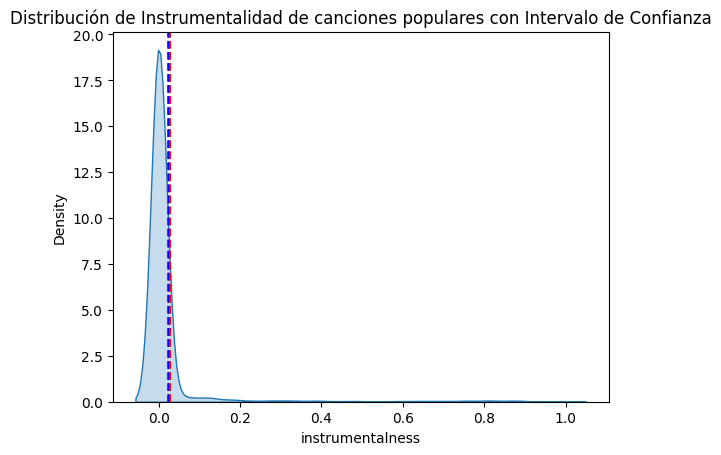

In [219]:
canciones_populares = df[df['track_popularity'] >= df['track_popularity'].quantile(0.75)]

sns.kdeplot(canciones_populares['instrumentalness'], fill=True)
plt.axvline(x=intervalo_confianza_instrumentalidad[0], color='red', linestyle='--')

plt.axvline(x=media_instrumentalidad, color='blue', linestyle='--')

plt.axvline(x=intervalo_confianza_instrumentalidad[1], color='red', linestyle='--')
plt.title('Distribución de Instrumentalidad de canciones populares con Intervalo de Confianza')
plt.show()

In [236]:
percentil_75_popularidad = df['track_popularity'].quantile(0.75)
canciones_populares = df[df['track_popularity'] >= percentil_75_popularidad]['loudness']
canciones_menos_populares = df[df['track_popularity'] < percentil_50_popularidad]['loudness']

media_volumen = canciones_populares.mean()
stderr_volumen = stats.sem(canciones_populares.dropna())
margen_error_volumen = stderr_volumen * stats.t.ppf((1 + 0.95) / 2, len(canciones_populares) - 1)
intervalo_confianza_volumen = (media_volumen - margen_error_volumen, media_volumen + margen_error_volumen)

print(f"Intervalo de confianza al 95% para el volumen: {intervalo_confianza_volumen}")

Intervalo de confianza al 95% para el volumen: (-6.348568558548645, -6.234754281688043)


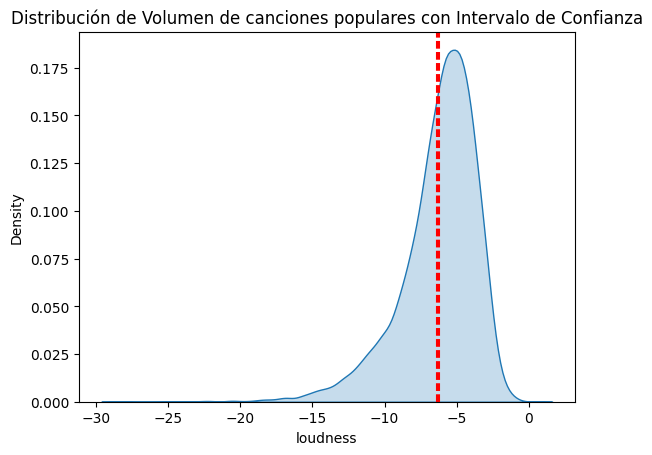

In [237]:
canciones_populares = df[df['track_popularity'] >= df['track_popularity'].quantile(0.75)]

sns.kdeplot(canciones_populares['loudness'], fill=True)
plt.axvline(x=intervalo_confianza_volumen[0], color='red', linestyle='--')
plt.axvline(x=intervalo_confianza_volumen[1], color='red', linestyle='--')
plt.title('Distribución de Volumen de canciones populares con Intervalo de Confianza')
plt.show()

# Conclusiones

De nuestras pruebas de hipotesis pudimos obtener varias observaciones sobre las canciones que son populares:

    - Tienen mas instrumentalidad y menos contenido vocal
    - Son mas bailables
    - Son mas ruidosas
    - El pop es mas popular que el rap, que a su vez es mas popular que el rock; El rock ha muerto

**Analizemos algunas canciones populares que cumplan con los criterios dados por los intervalos de confianza** 

In [173]:
canciones_cumplen_criterios = df[
    (df['duration_ms'] >= intervalo_confianza_duracion[0]/0.001) &
    (df['duration_ms'] <= intervalo_confianza_duracion[1]/0.001) &
    (df['danceability'] >= intervalo_confianza_bailabilidad[0]) &
    (df['danceability'] <= intervalo_confianza_bailabilidad[1]) &
    (df['instrumentalness'] >= intervalo_confianza_instrumentalidad[0]) &
    (df['instrumentalness'] <= intervalo_confianza_instrumentalidad[1]) &
    (df['loudness'] >= intervalo_confianza_volumen[0]) &
    (df['loudness'] <= intervalo_confianza_volumen[1])
]

canciones_cumplen_criterios[['track_name', 'track_artist', 'track_popularity']].sort_values(by='track_popularity', ascending=False)

,track_name,track_artist,track_popularity


#### En realidad, podemos ver que ninguna cancion hasta ahora cumple con los requisitos exactos de -todos- los criterios que usamos para determinar si una cancion era buena. Solo aligerando un poco los filtros, podemos llegar a ver algunas canciones que si lo cumplan

In [169]:
canciones_cumplen_criterios = df[
    (df['instrumentalness'] >= intervalo_confianza_instrumentalidad[0]) &
    (df['instrumentalness'] <= intervalo_confianza_instrumentalidad[1]) &
    (df['loudness'] >= intervalo_confianza_volumen[0]) &
    (df['loudness'] <= intervalo_confianza_volumen[1])
]

canciones_cumplen_criterios[['track_name', 'track_artist', 'track_popularity']].sort_values(by='track_popularity', ascending=False)

,track_name,track_artist,track_popularity
28918,Monster,LUM!X,77
10321,Angst,INZO,53
31770,Monster,LUM!X,52
9273,Bunker,Sa4,44
30431,Dirty Wine,R-Cue,36
9741,Presente,Control Machete,35
28882,She Likes It,Mike L,32
2120,The Bad Touch,Bloodhound Gang,11


In [156]:
canciones_cumplen_criterios = df[
    (df['danceability'] >= intervalo_confianza_bailabilidad[0]) &
    (df['danceability'] <= intervalo_confianza_bailabilidad[1]) &
    (df['loudness'] >= intervalo_confianza_volumen[0]) &
    (df['loudness'] <= intervalo_confianza_volumen[1])
]

canciones_cumplen_criterios[['track_name', 'track_artist', 'track_popularity']].sort_values(by='track_popularity', ascending=False)

,track_name,track_artist,track_popularity
17173,Back Around,Sole Sole,43
17169,Meet You There,Max Lean,39
4482,King's Cup,Charlee Remitz,19
7785,Run to the Money,D'african,16
26787,Numb,Max Jury,1
18023,Como Soy,Mane de la Parra,0


In [166]:
canciones_cumplen_criterios = df[
    (df['instrumentalness'] >= intervalo_confianza_instrumentalidad[0]) &
    (df['instrumentalness'] <= intervalo_confianza_duracion[1]) &
    (df['danceability'] >= intervalo_confianza_bailabilidad[0]) &
    (df['danceability'] <= intervalo_confianza_bailabilidad[1]) &
    (df['track_popularity'] >= 60)
].sort_values(by=['track_popularity'])

canciones_cumplen_criterios[['track_name', 'track_artist', 'track_popularity']].sort_values(by='track_popularity', ascending=False)

,track_name,track_artist,track_popularity
43,bad guy (with Justin Bieber),Billie Eilish,83
18381,bad guy (with Justin Bieber),Billie Eilish,83
19794,bad guy (with Justin Bieber),Billie Eilish,83
23802,bad guy (with Justin Bieber),Billie Eilish,83
14149,Give It Away,Red Hot Chili Peppers,73
15434,Give It Away,Red Hot Chili Peppers,73
347,Apple Juice (feat. Carla Monroe) - MOTi Remix,SLATIN,63
5884,Take Me Back,WYS,60


# Analisis


El análisis de características como la bailabilidad, la duración y la sonoridad ayuda a identificar tendencias actuales en la música popular, lo que es crucial para productores y artistas que buscan crear música que sea popular.

Al entender qué hace que una canción sea popular, las compañías discográficas y los artistas pueden desarrollar estrategias de marketing más efectivas, enfocándose en promocionar canciones con características que se alinean con las preferencias del público.

**Aun a pesar de todo esto, claro esta que el proceso de creacion de musica aun es bastante artesanal, y nunca podra ser completamente automatizado y decidido por criterios estadisticos.**

### Por ultimo, Disfrutemos algunas canciones que han sido validadas por ser estadisticamente buenas

In [191]:
from IPython.display import YouTubeVideo
from IPython.display import HTML

In [197]:
video_url = "https://www.youtube.com/watch?v=DyDfgMOUjCI"
HTML(f'<a href="{video_url}" target="_blank">bad guy - billie eiish</a>')

In [198]:
video_url = "https://www.youtube.com/watch?v=VWNFj9rm6tc"
HTML(f'<a href="{video_url}" target="_blank">Monster - Lum!x</a>')

In [199]:
video_url = "https://www.youtube.com/watch?v=dQTGq3bXnTA"
HTML(f'<a href="{video_url}" target="_blank">back around - Sole Sole</a>')

# Referencias

Thompson, C., Parry, J., Phipps, D., & Wolff, T. (n.d.). Spotifyr: A Comprehensive Analysis of Spotify Data. [https://www.rcharlie.com/spotifyr/](https://www.rcharlie.com/spotifyr/)